# RNN 실습(백견불여일타 딥러닝 입문 참고)

### cos 함수를 이용하여 데이터 만들기

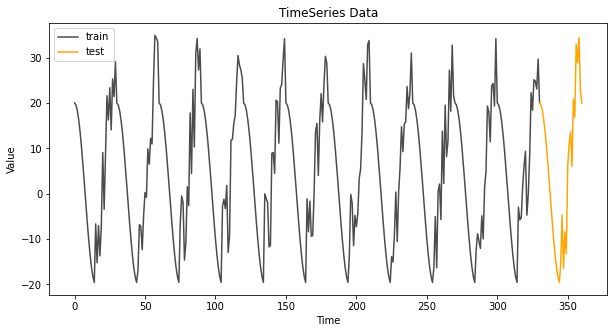

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

### 전처리 과정 수행하기

In [ ]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


## 데이터 형태 확인하기

In [ ]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i],'|', b[i])


[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


### SimpleRNN을 사용하여 모델 구성하기

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
# SimpleRNN 층을 첫 번째 층으로 사용하는 경우,
# 반드시 input_shape를 명시해주어야 합니다.
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


### 모델 학습시키기

In [ ]:
model.fit(x_train, y_train, epochs = 200, batch_size = 12)

Epoch 1/200
30/30 [==============================] - 2s 7ms/step - loss: 274.8047
Epoch 2/200
30/30 [==============================] - 0s 7ms/step - loss: 204.8511
Epoch 3/200
30/30 [==============================] - 0s 7ms/step - loss: 157.7353
Epoch 4/200
30/30 [==============================] - 0s 7ms/step - loss: 151.1831
Epoch 5/200
30/30 [==============================] - 0s 7ms/step - loss: 121.1267
Epoch 6/200
30/30 [==============================] - 0s 6ms/step - loss: 110.5023
Epoch 7/200
30/30 [==============================] - 0s 6ms/step - loss: 119.7360
Epoch 8/200
30/30 [==============================] - 0s 6ms/step - loss: 95.5806
Epoch 9/200
30/30 [==============================] - 0s 6ms/step - loss: 102.5172
Epoch 10/200
30/30 [==============================] - 0s 7ms/step - loss: 95.6531
Epoch 11/200
30/30 [==============================] - 0s 6ms/step - loss: 83.5521
Epoch 12/200
30/30 [==============================] - 0s 7ms/step - loss: 84.0519
Epoch 13/200
30/3

#### 예측 결과 그려보기

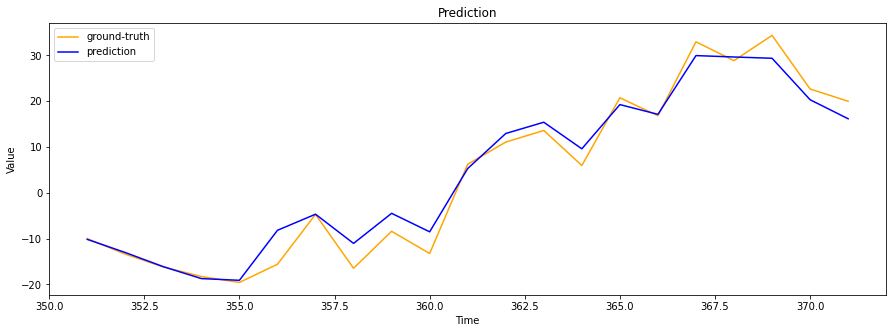

In [ ]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

### 간단한 RNN 실습

---model_0: training complete---
---model_1: training complete---


FileNotFoundError: ignored

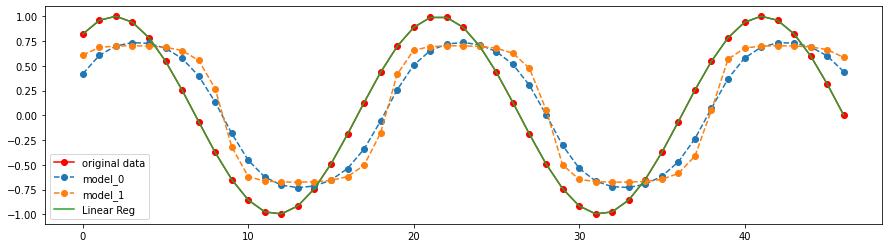

In [ ]:
"""
- 일단 RNN을 만들기 전에, 내가 만들려고 하는 것이 (many or one) to (many or one) 중에서 무엇인지 알아야 함
- 간단한 시계열 값을 예측한다고 할 때, 이전 data 3개를 가지고, 1개의 값을 예측한다면, many to one의 형태가 되겠다. 
"""
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn.linear_model import LinearRegression

s = np.sin(2 * np.pi * 0.125 * np.linspace(0, 20, 50))

timestep =3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측한다. 
xs, ys = [], []

for i in range(timestep, len(s)):
    xs.append(np.array([s[i-j] for j in range(timestep, 0, -1)]))
    ys.append(s[i])
xs, ys = np.array(xs).reshape(len(xs), 3, 1), np.array(ys).reshape(len(ys), 1)

## 이제 rnn에 적용해 봅시다. 
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

"""
RNN에는 x 데이터가 (n_sample, time step, x vector의 크기)로 들어가야 함 
- n_sample: sample의 수 
- time step: t-n 에서 n이 몇인가를 묻는 것
- x vector의 크기: 현재는 1개짜리지만, 여러 값이 들어오고, 여러 값을 한번에 예측해야 할 경우도 있음. 
    - 그리고 xvector의 크기는 yvector의 크기과 같아야 함(당연)
"""
## benchmark model: Linear Regression
reg  = LinearRegression()
reg.fit(xs.reshape(len(xs), 3), ys)

## simple RNN model 
np.random.seed(0)# seed 고정
models = [#simpleRNN에서 units은 해당 cell의 결과로 나오는 dim을 말함. 
    Sequential([SimpleRNN(units=1, input_shape=(3, 1)),
    ]), 
    Sequential([SimpleRNN(units=1, input_shape=(3, 1)),
                Dense(10, activation='linear'), 
                Dense(1, activation='linear'), 
    ]),
]

for i, m in enumerate(models):
    m.compile(loss='mse', optimizer='sgd')
    history = m.fit(xs, ys, epochs=150, verbose=0)
    print("---model_{}: training complete---".format(i))

## 그림을 그립시다. 
fig = plt.figure(figsize=(15, 4)) 
plt.plot(s[3:], 'ro-', label='original data')# 원래 plot, 앞의 3칸의 경우, 
for i, m in enumerate(models):
    plt.plot(m.predict(xs), '--', marker='o', label='model_{}'.format(i))
plt.plot(reg.predict(xs.reshape(len(xs), 3)), label='Linear Reg')
plt.legend()

plt.savefig('../../assets/images/markdown_img/180620_1538_simple_rnn.svg')
plt.show()

## IMDB 데이터셋 사용하기

인터넷 영화 데이터베이스로부터 가져온 양극단의 리뷰 5만 개로 이루어진 IMDB 데이터셋을 이용해서 긍정/부정으로 분류하는 예제이다. 훈련 데이터 2만 5,000개와 테스트 데이터 2만 5000개로 이루어져 있다.


In [ ]:
#2020.01.15
#영화 리뷰 분류
#0. 사용할 패키지 불러오기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    #크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 만들기
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        #result[i] 에서 특정 인덱스의 위치를 1로 만듦
    return results
x_train =vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs= 10, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 35ms/step - loss: 0.6063 - acc: 0.7069 - val_loss: 0.4035 - val_acc: 0.8638
Epoch 2/10
30/30 [==============================] - 1s 18ms/step - loss: 0.3379 - acc: 0.8987 - val_loss: 0.3129 - val_acc: 0.8841
Epoch 3/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2305 - acc: 0.9281 - val_loss: 0.3192 - val_acc: 0.8673
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1846 - acc: 0.9428 - val_loss: 0.3183 - val_acc: 0.8694
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1480 - acc: 0.9536 - val_loss: 0.2940 - val_acc: 0.8832
Epoch 6/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1198 - acc: 0.9655 - val_loss: 0.2910 - val_acc: 0.8865
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.0967 - acc: 0.9730 - val_loss: 0.3130 - val_acc: 0.8828
Epoch 8/10
30/30 [==============================] - 1s 18ms/step - loss: 0.0791 - a

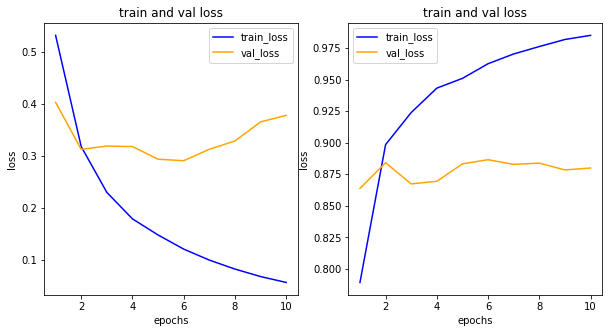

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# model.summary()
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Epoch 1/15
625/625 [==============================] - 308s 491ms/step - loss: 0.7005 - acc: 0.5219 - val_loss: 0.4790 - val_acc: 0.7774
Epoch 2/15
625/625 [==============================] - 306s 490ms/step - loss: 0.5279 - acc: 0.7390 - val_loss: 0.4553 - val_acc: 0.7998
Epoch 3/15
625/625 [==============================] - 307s 491ms/step - loss: 0.4692 - acc: 0.7784 - val_loss: 0.4687 - val_acc: 0.7878
Epoch 4/15
625/625 [==============================] - 305s 488ms/step - loss: 0.4858 - acc: 0.7710 - val_loss: 0.6111 - val_acc: 0.6522
Epoch 5/15
625/625 [==============================] - 303s 485ms/step - loss: 0.5728 - acc: 0.6980 - val_loss: 0.5616 - val_acc: 0.7080
Epoch 6/15
625/625 [==============================] - 303s 485ms/step - loss: 0.4577 - acc: 0.7886 - val_loss: 0.4352 - val_acc: 0.8056
Epoch 7/15
625/625 [==============================] - 303s 485ms/step - loss: 0.5585 - acc: 0.7215 - val_loss: 0.7073 - val_acc: 0.6022
Epoch 8/15
625/625 [============================

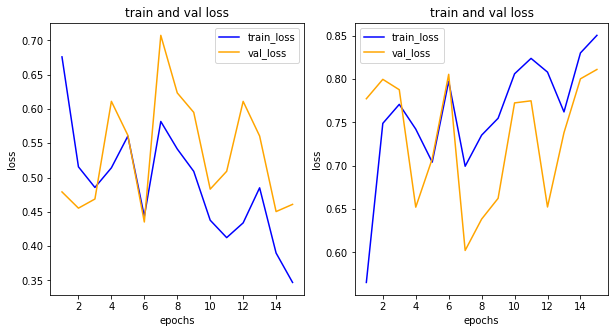

In [ ]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

## char-RNN에 대해 익힐 수 있는 예제 : 셰익스피어의 희곡을 학습하여 새로운 희곡 스타일의 문자생성

** 참고 : https://github.com/sherjilozair/char-rnn-tensorflow **

# 딥러닝을 이용한 자연어 처리 입문(https://wikidocs.net/book/2155)

In [ ]:
!git clone https://github.com/sherjilozair/char-rnn-tensorflow.git

Cloning into 'char-rnn-tensorflow'...
remote: Enumerating objects: 404, done.
remote: Total 404 (delta 0), reused 0 (delta 0), pack-reused 404
Receiving objects: 100% (404/404), 508.45 KiB | 11.56 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [ ]:
!python /content/char-rnn-tensorflow/model.py

2021-03-04 08:45:02.501323: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/content/char-rnn-tensorflow/model.py", line 2, in <module>
    from tensorflow.contrib import rnn
ModuleNotFoundError: No module named 'tensorflow.contrib'


In [ ]:
modle.py --model = 'nas' --rnnsize = 256